In [1]:
from entsim_lib import *

# Two-Photon Source Simulator
## Bell's Inequality and Quantum State Tomography

To run, ensure that the file entsim_lib is in the same directory or otherwise accessible. Note that this library has known compatibility issues with SymPy.

# Part One: Single-Qubit Measurements

For the first part of the lab, the instructor has provided you with a single-photon source. You're given a button which can switch the photon's polarization to any one of the six Pauli eigenstates:
- The Z eigenstates, corresponding to horizontal (H) and vertical (V) polarizations
- The X eigenstates, corresponding to +45° diagonal (D) and -45° anti-diagonal (A) polarizations
- The Y eigenstates, corresponding to left-circular (L) and right-circular (R) polarization

The corresponding quantum state vectors for this ideal states are noted below:

In [2]:
print("H=\n",vecH)
print("V=\n",vecV)
print("D=\n",vecD)
print("A=\n",vecA)
print("R=\n",vecR)
print("L=\n",vecL)

H=
 [[1]
 [0]]
V=
 [[0]
 [1]]
D=
 [[0.70710678]
 [0.70710678]]
A=
 [[ 0.70710678]
 [-0.70710678]]
R=
 [[0.70710678+0.j        ]
 [0.        +0.70710678j]]
L=
 [[0.70710678+0.j        ]
 [0.        -0.70710678j]]


The instructor has given you a half-wave plate, a quarter-wave, and a polarizing beam-splitter, as in the below schematic: 

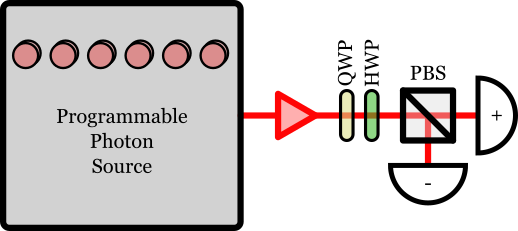

*(image: A programmable photon source emits photons with a known polarization state, which are then analyzed by a quarter-wave plate (QWP) followed by a half-wave plate (HWP) followed by a polarizing beam-splitter (PBS). The transmitted photons through the PBS are detected with the "+" detector, and the reflected photons are measured by the "-" detector.)*

The half-wave plate (HWP) and quarter-wave plate (QWP) can be freely rotated, and have a marked "0" angle. These wave plates impart a phase shift between two linear polarizations, depending on how the "fast" and "slow" axes are aligned. In the half-wave plate, the phase shift is pi (a "half-wave" shift). In the quarter-wave plate, the phase shift is pi/2.

At "0", the fast axis is aligned to horizontal polarization, and the slow axis aligned to vertical polarization. The transformation matrices are therefore:

In [3]:
print(HWP(0))
print(QWP(0))

[[ 1.  0.]
 [ 0. -1.]]
[[1.+0.j 0.+0.j]
 [0.+0.j 0.-1.j]]


Note that the order of the wave-plates is important when modelling the system, and the photons encounter the QWP before the HWP.

The polarizing beam-splitter (PBS) either transmits or reflects photons, depending on their polarization. Horizontally polarized photons are always transmitted, and vertically polarized photons are always reflected. Superposition states of H and V are probabalistically transmitted or reflected, corresponding to their H and V components.

i.e. Probability(transmitted) = |<H|ψ>|^2, Probability(reflected) = |<V|ψ>|^2

Two single-photon detectors are placed after the PBS, one in each port. The detector that measure the transmitted photons is labelled the "positive" port, and the detector that measures the reflected photons is labelled the "negative" port.

### Questions

1. *What is the transformation matrix of a QWP and HWP rotated to an arbitrary angle? Recall the two-dimensional rotation matrix rules.*

2. *Which two states does the setup with the wave-plates at 0 followed by the PBS distinguish between? What does a count in the positive or negative detector signify?*

3. *Show that a QWP at pi/4 followed by a HWP at 0 converts right-circular polarized light to horizontal polarization and vice-versa.  How does this series of wave-plates transform left-circularly polarized light?*

4. *Show that a QWP at pi/4 followed by a HWP at pi/8 converts diagonally polarized light to horizontal polarization and vice-versa. How does this series of wave-plates transform anti-diagonally polarized light?*

The instructor gives you access to the photon source, and allows you to make the following choices:

* The angle of the HWP
* The angle of the QWP
* The total time to measure photon for (in seconds)
* The state that gets sent in

You can call the device as **OneQBmeasTest(HWP angle, QWP angle, Measurement Time, State Vector)**. It will then return the total number of counts it measures in the Positive and Negative detectors.

The source emits approximately 100,000 photons per second. The detectors have a detection efficiency of approximately 10%, and a dark count rate (detections due to room light or electronic noise) of approximately 50 per second.

### Questions

5. *Test the settings found in Q3 and Q4, and write down which HWP and QWP angles are used to measure in each Pauli eigenbasis.*
6. *Use the one-qubit tester to experimentally find the expectation values in each Pauli eigenbasis of the state vecR. Recall that expectation values can be calcuated from counts as (Np-Nm)/(Np+Nm), where Np are the counts in the positive detector and Nm are the counts in the negative detector.*

In [2]:
OneQBmeasTest(pi/8,pi/4,1,vecD)

Connected to source:
 [[0.70710678]
 [0.70710678]]
Setting wave plates...
Wave plates set...
Measuring counts...
Plus detector counts:  10003 
Minus detector counts:  56


array([10003,    56])

# Part Two: Single-Qubit Quantum State Tomography

For the next step, the instructor swaps out the original photon source for one of three unknown sources. They ask you to figure out the **density matrix** of the unknown quantum states.

You can query the source as **OneQBmeas(HWP angle, QWP angle, Measurement Time, Source)**, where "Source" can be either 0, 1, or 2. The instructor says the following about the sources:
* "I set up Source 0 to be diagonal, but it might have been shaken up along the way"
* "I have very *mixed* opinions on Source 1, but there might be something hidden in there"
* "Source 2 seems to be working by pure *magic*"

In [10]:
OneQBmeas(pi/8, pi/4, 1, 2)

Connected to source  2
Setting wave plates...
Wave plates set...
Measuring counts...
Plus detector counts:  7846 
Minus detector counts:  2136


array([7846, 2136])

### Questions

7. *A one-qubit density matrix has three degrees of freedom, and can be completely reconstructed with the projections onto three quantum states. Show that you can find the density matrix of a one-qubit state by knowing the projections onto H, D, and R, along with V for normalization. This process is analytic and called **linear inversion**, and can be done by hand or using a computer.*
8. *Use your measurement settings from Q5 to perform one-qubit quantum state tomography on the three single-photon sources provided.*

# Part Three: Bell's Inequality

You are given access to an entangled photon source. The lab instructor tells you they tried very hard to make an entangled photon state close to the singlet, or Psi-Minus, Bell state (|01> - |10>)/sqrt(2).

This time, you're given a half-wave plate and a PBS in each arm (no quarter-wave plate), as in the image below:

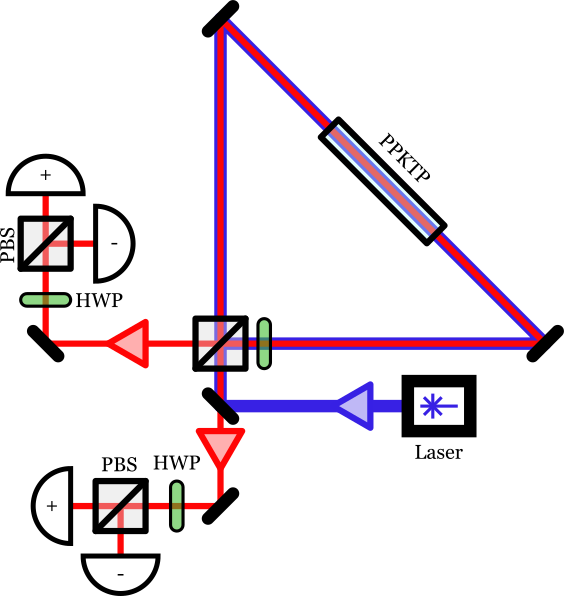

*(caption: A blue laser illuminates a PPKTP nonlinear crystal in a Sagnac triangle loop, generating red downconverted photons. The red photons are separated by a polarizing beam splitter (PBS), and each photon is analyzed with a half-wave plate (HWP) followed by a PBS. A photon detector is placed at each port of the PBS, with the transmission port labelled "positive" and the reflection port labelled "negative".)*

You can run the experiment using the function **TwoQBmeasBell(HWP1 angle, HWP2 angle, Measurement Time)**.

### Questions

1. *Show that a half-wave plate at an angle "a" followed by a horizontal polarizer projects onto the state Cos(2a)|0>+Sin(2a)|1>.*
2. *Show that a half-wave plate at an angle "a" transforms a Pauli-Z measurement into a measurement between Pauli-Z and Pauli-X, of the form Cos(4a)Z+Sin(4a)X.*
3. *Find the settings corresponding to the CHSH-Bell inequality measurements for Phi Plus, and see if this source violates the CHSH-Bell inequality.*

Recall that the Bell inequality is a function of **expectation values**, which for two qubits are functions of four coincidence data points each, as:

$E=Tr(\hat{M}\rho)=\frac{N_{++}-N_{+-}-N_{-+}+N_{--}}{N_{++}+N_{+-}+N_{-+}+N_{--}}$ 

where, for example, $N_{+-}$ corresponds to the coincidence counts measured between the positive detector for Photon 1 and the negative detector for Photon 2.

In [7]:
TwoQBmeasBell(0*pi/8,0*pi/8,1)

Connected to source 0
Setting wave plates...
Wave plates set...
Measuring counts...

Singles Counts 1:
Plus:  4948 
Minus:  4899 
Singles Counts 2:
Plus:  4961 
Minus:  5049 

Coincidence Counts:
++  611 
+-  0 
-+  3 
--  636


array([4948, 4899, 4961, 5049,  611,    0,    3,  636])

### Error Analysis

Quantum mechanics is probabilistic, and any statements we can make about the validity of local-hidden variable models from this data are only as strong as the statistics of our measurements.

We have two options for error analysis:
* We can re-run the experiment a number of times, and show that a violation of the CHSH-Bell inequality is statistically significant and repeatable.
* We can assume a Poissonian error model for our photon detections. This assumes that each time we run the experiment (i.e. each time we measure a photon) is independent and identical. With this assumption, the noise in the count rate should be Poissonian; if we measure "N" counts, we can only claim that to be significant with +/- sqrt(N).

### Questions
4. *Re-run a single setting multiple times and show that the standard deviation of the count results closely obeys Poissonian statistics. Comment on the advantages and disadvantages of increasing the Measurement Time parameter.*
5. *What is the uncertainty in your CHSH-Bell value? How statistically significant is the violation of local-hidden-variable models?*


# Part Four: Two-Qubit Quantum State Tomography

The instructor next provides you with three black boxes, each containing some source of two photons, as in the image below:

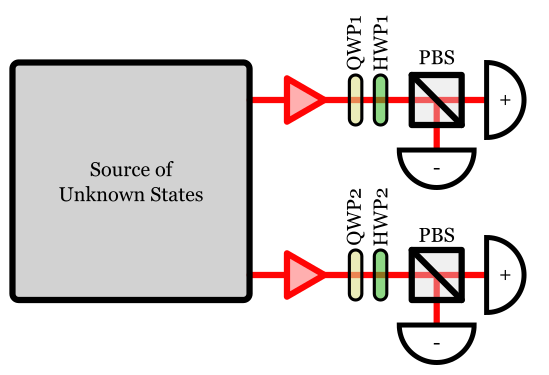

*(image: A black-box source of unknown quantum states outputs two red photons, which are analyzed by a quarter-wave plate (QWP) followed by a half-wave plate (HWP), followed by a polarizing beam-splitter (PBS) and two photon detectors.)*

Just as done for the single-qubit case, they're asking you to find the full two-qubit quantum state of each, with the following prior information:

* "Source 0 is the same one used in the previous experiment on Bell's inequalities"
* "I think Source 1 is also entangled, but I could be *imagining* things"
* "Source 2 has a whole slew of *separate* issues"

You can call the two-qubit device using **TwoQBmeas(HWP1 angle, QWP1 angle, HWP2 angle, QWP 2 angle, Measurement Time, Source)**, where "Source" can be equal to 0, 1, or 2.

If you wish to automate, note that the function **TwoQBmeas** outputs an eight-element array containing the single-detection events for each detector and the coincidence counts in the form [+1,-1,1+,1-,++,+-,-+,--].

In the single-qubit case, measurement in the three Pauli bases was enough to calculate the density matrix. In the two-qubit case, it will be necessary to measure all possible *combinations* of Pauli bases, i.e. ZZ, ZX, ZY, XZ, XX, XY, YZ, YX, YY. Once again, we will calculate the density matrix using **linear inversion**.

In [11]:
TwoQBmeas(0,0,0,0,1,0)

Connected to source 0
Setting wave plates...
Wave plates set...
Measuring counts...

Singles Counts 1:
Plus:  5046 
Minus:  4898 
Singles Counts 2:
Plus:  4934 
Minus:  5127 

Coincidence Counts:
++  644 
+-  6 
-+  1 
--  644


array([5046, 4898, 4934, 5127,  644,    6,    1,  644])